# BIKE SALES MADE ON THE BIKE IN EUROPE

<img srce="https://dbyvw4eroffpi.cloudfront.net/cms/sigma-sports-oakham-store-bikes.jpg" style="width:400px,float:right,margin:0 30px 30px 30px;"></img>

**DataSet**  :   [Bike Store Sales](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#reading our file
df=pd.read_csv(r"C:\Users\amirk\OneDrive\Desktop\FULLSTACK\DATAANALYZ\DATA-ANALYZE-PROJECTS\7-bike-sales-europe\Sales.csv")
df.head() #just viewing 5 first rows and columns of this data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [10]:
df['Country'].unique() #viewing all unique values that exist in country column

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [11]:
df.shape #showing the numbers of rows and the columns 
shape=df.shape
row=shape[0]
col=shape[1]
print(f"rows of the dataset is : {row}")
print(f"columns of the dataset is : {col}")

rows of the dataset is : 113036
columns of the dataset is : 18


In [12]:
# Data Preprocessing
#-------------------------------------------#
### **Identify Type of Columns**
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [13]:
df['Date']=pd.to_datetime(df['Date']) #coverting data types objects

In [14]:
df['Calculated_date']=df[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)

C:\Users\amirk\AppData\Local\Temp\ipykernel_12248\3533179195.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Calculated_date']=df[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)


In [15]:
df['Calculated_date']=pd.to_datetime(df['Calculated_date'])
df['Calculated_date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_date, dtype: datetime64[ns]

### **Identify Null And Missing Values**


In [17]:
df.isnull().sum() #how many null values are there 

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Calculated_date     0
dtype: int64

In [18]:
#having an overview of our data file
df.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_date
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360,2014-11-23 12:14:55.063519232
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,2011-01-01 00:00:00
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000,2013-12-22 00:00:00
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000,2014-06-27 00:00:00
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000,2016-01-09 00:00:00
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000,2016-07-31 00:00:00
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674,NaN


 ## Numerical analysis and visualization
_We'll analyze the Numerical features column:_

In [20]:
df['Unit_Cost'].mean()

267.296365759581

In [21]:
df['Unit_Cost'].median()

9.0

<Axes: >

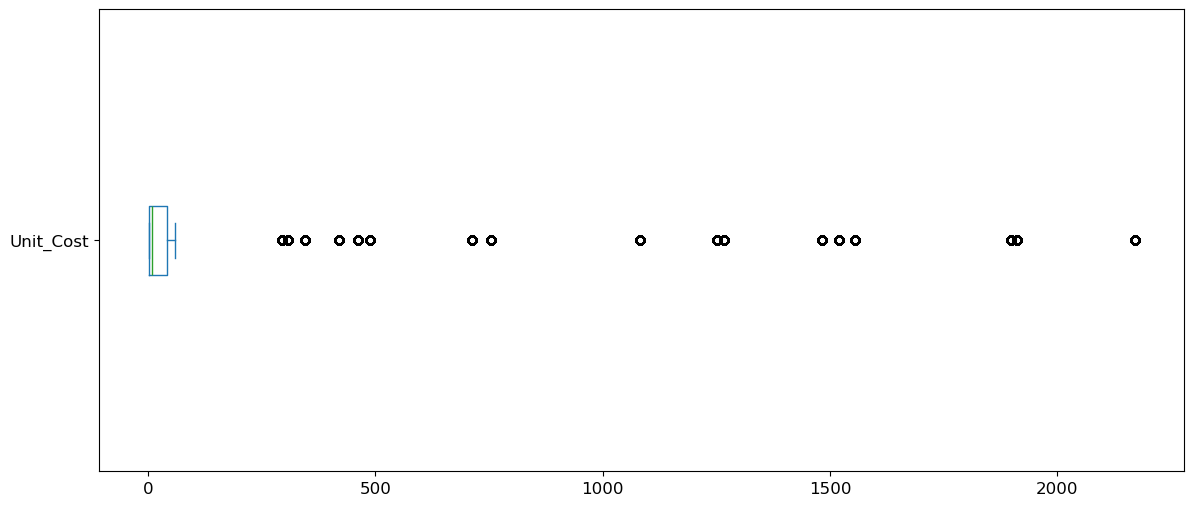

In [22]:
df['Unit_Cost'].plot(kind='box',figsize=(14,6),fontsize=12,vert=False)

Text(0, 0.5, 'Sales')

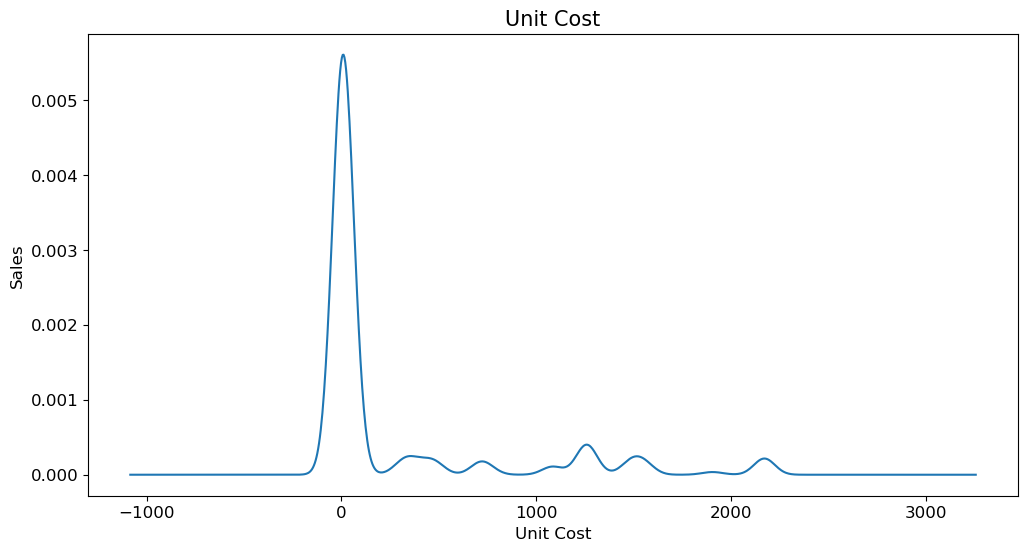

In [23]:
df['Unit_Cost'].plot(kind='density',fontsize=12,figsize=(12,6))
plt.title('Unit Cost',fontsize=15)
plt.xlabel('Unit Cost',fontsize=12)
plt.ylabel('Sales',fontsize=12)

### Median and Mean at Unit Cost


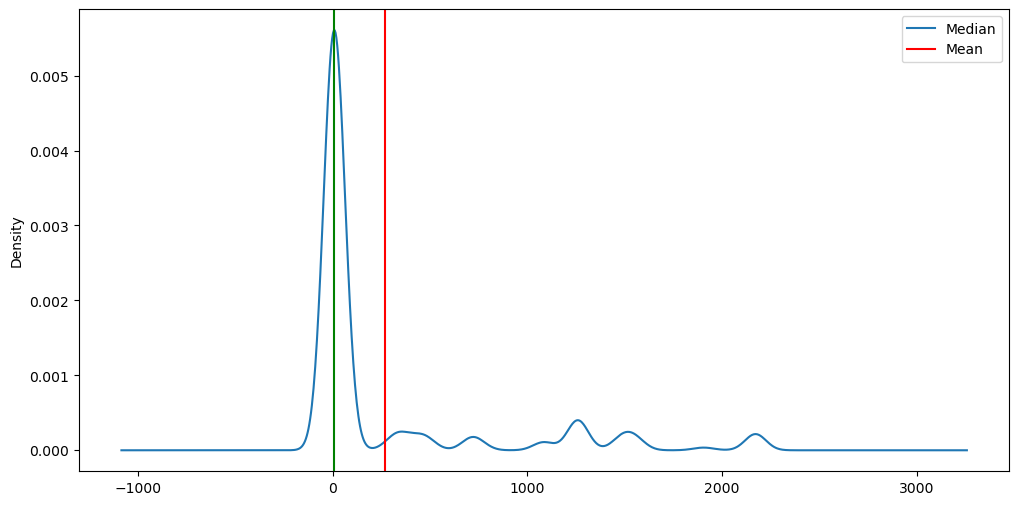

In [25]:
 #ax.axvlines(Sales['Unit_Cost'].mean())
ax=df['Unit_Cost'].plot(figsize=(12,6),kind='density') #creating a vertical line to show the mean
mean=ax.axvline(df['Unit_Cost'].mean(),color='red')
median=ax.axvline(df['Unit_Cost'].median(),color='green')
plt.legend({'Median':median,'Mean':mean})#lable of the guideness on the graph

Text(0, 0.5, 'Number of Sales')

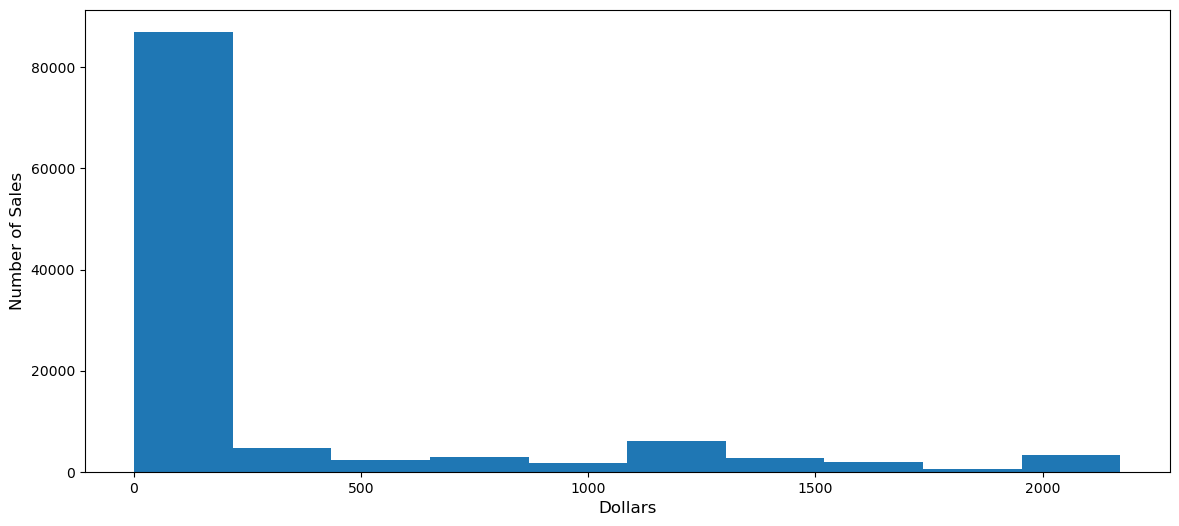

In [26]:
ax=df['Unit_Cost'].plot(kind='hist',figsize=(14,6))
ax.set_xlabel("Dollars",fontsize=12)
ax.set_ylabel("Number of Sales",fontsize=12)

In [27]:
#calculating the mean of all ages of customers
df['Customer_Age'].value_counts().mean()

1614.8

<Axes: >

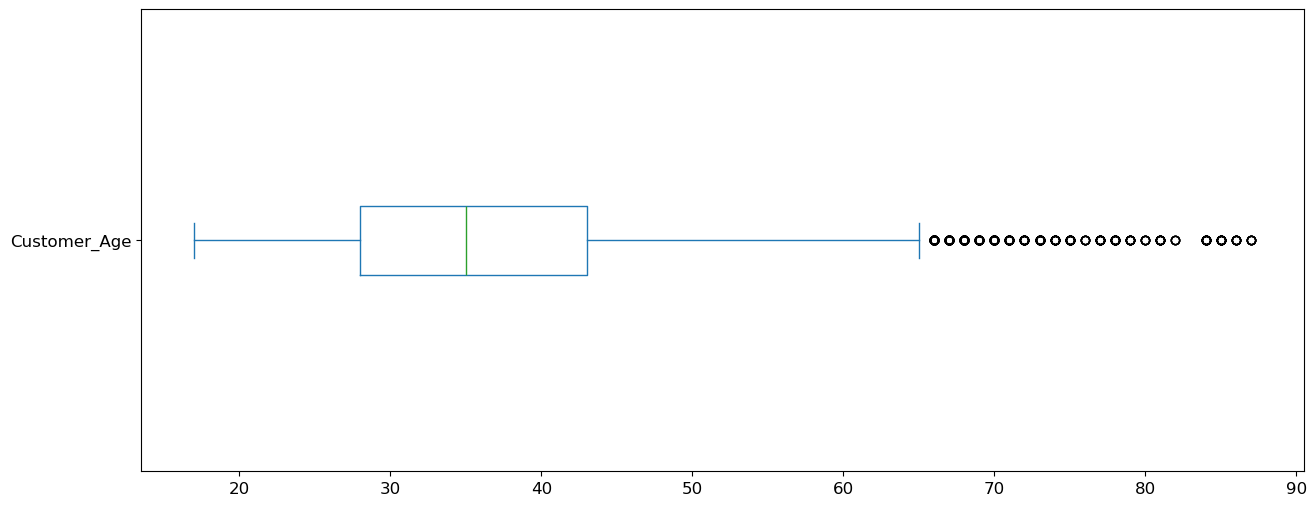

In [28]:
df['Customer_Age'].plot(kind='box',fontsize=12,figsize=(15,6),vert=False)

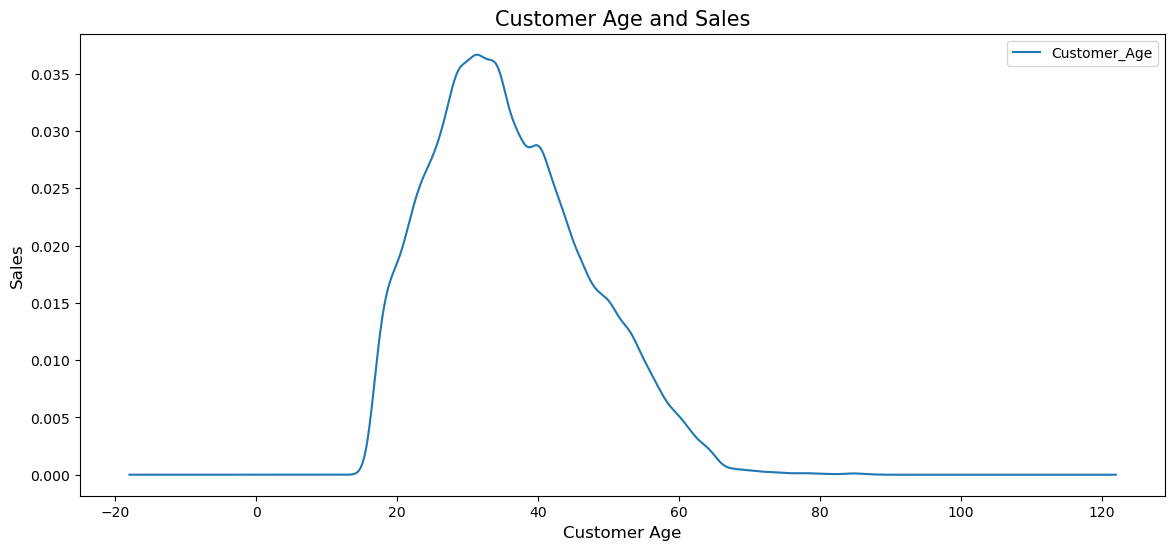

In [29]:
df['Customer_Age'].plot(kind="kde",figsize=(14,6))
plt.title("Customer Age and Sales",fontsize=15)
plt.xlabel("Customer Age",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.legend()


### Sales According to years


In [31]:
df['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

<Axes: xlabel='Year'>

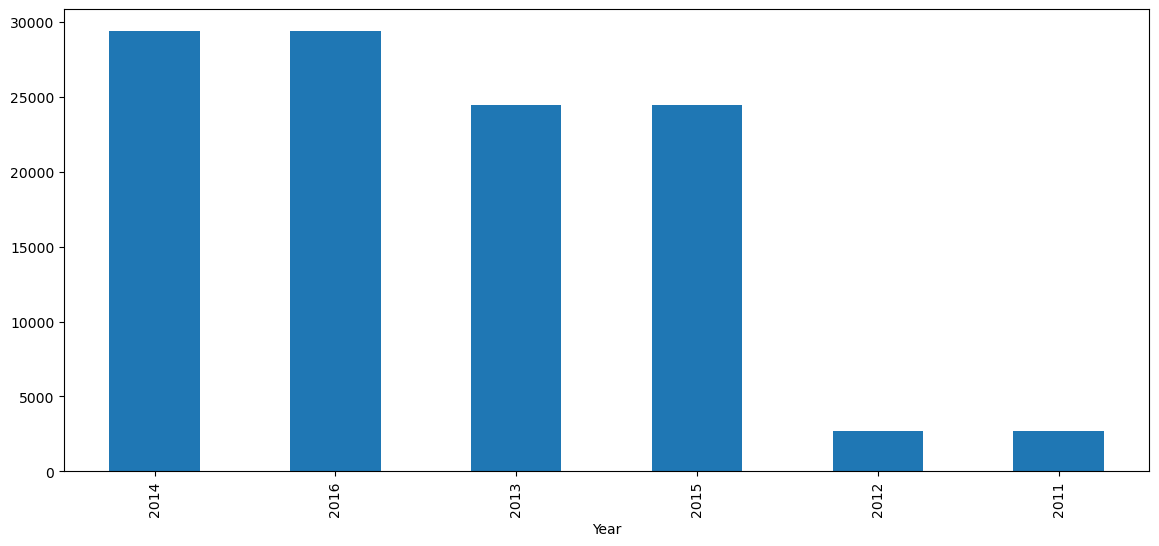

In [32]:
df['Year'].value_counts().plot(kind='bar',figsize=(14,6))

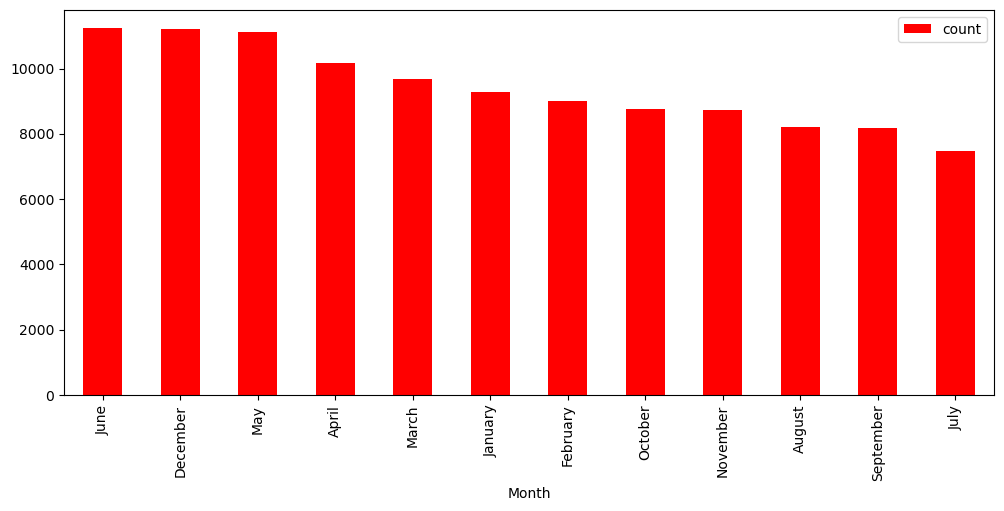

In [33]:
df['Month'].value_counts().plot(kind='bar',figsize=(12,5),color='red')
plt.legend()

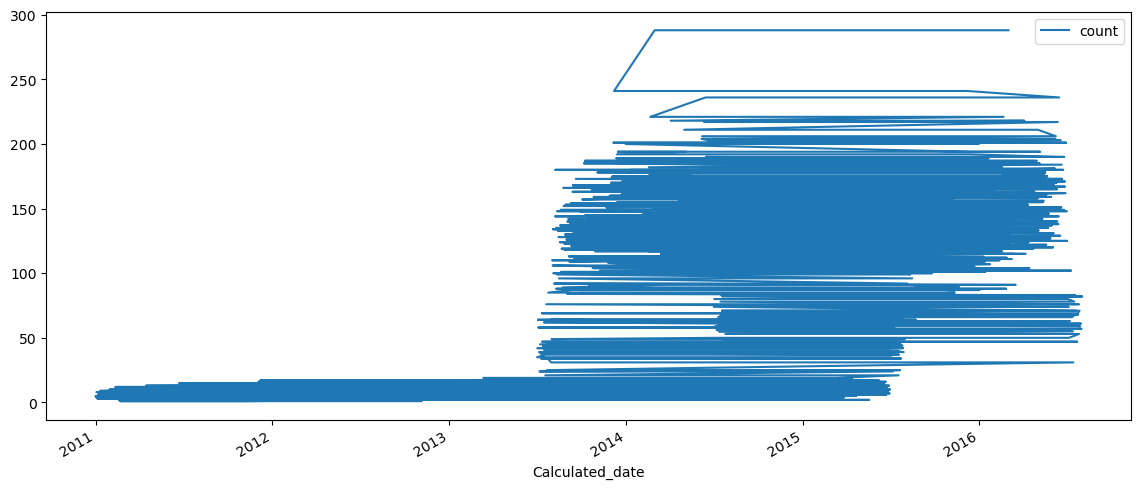

In [34]:
df['Calculated_date'].value_counts().plot(kind='line',figsize=(14,6))
plt.legend()

### Increase 50 Udollar'S revenue to every sale


In [36]:
df["Revenue"]+50

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

> ### Sales According to Age Group


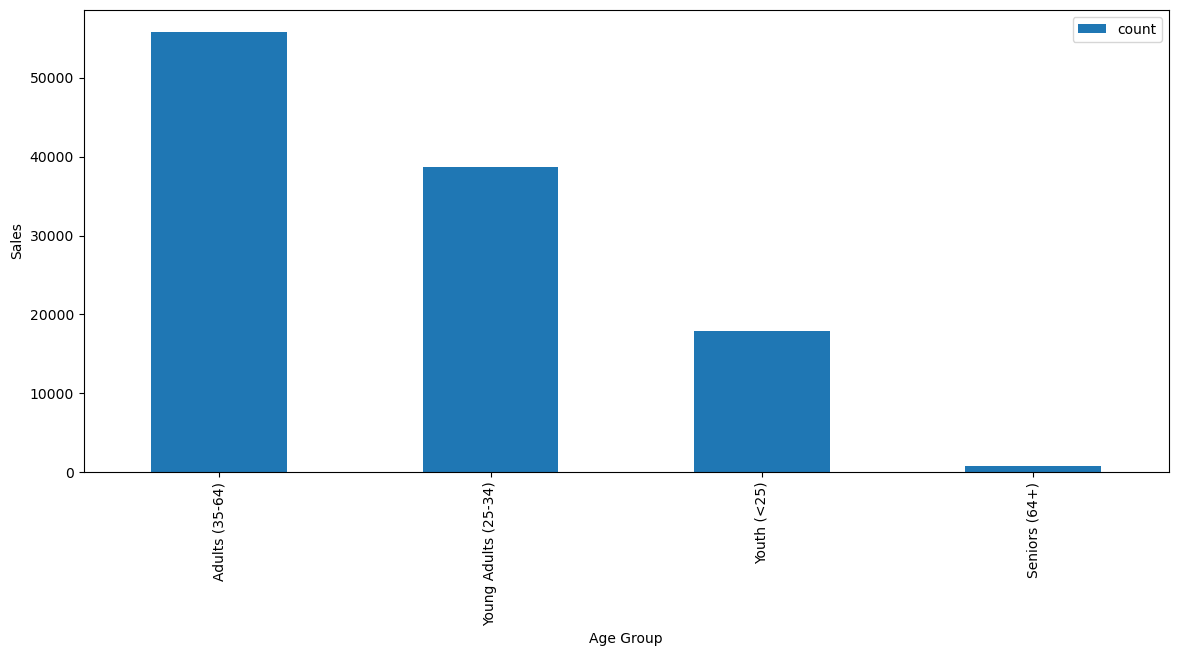

In [38]:
df["Age_Group"].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel("Age Group")
plt.ylabel("Sales")
plt.legend()

Text(0.5, 1.0, 'Age Group')

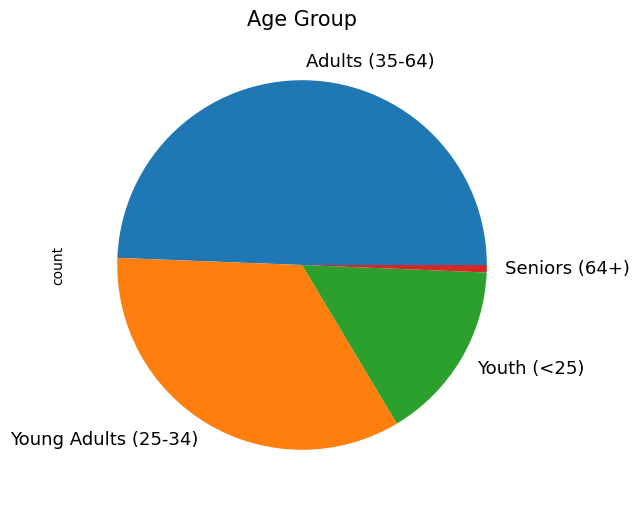

In [39]:
df['Age_Group'].value_counts().plot(kind='pie',figsize=(14,6),fontsize=13)
plt.title('Age Group',fontsize=15)

### Mean of Sales order


In [41]:
df['Order_Quantity'].mean()

11.901659648253654

Text(0.5, 1.0, 'Order Quantity')

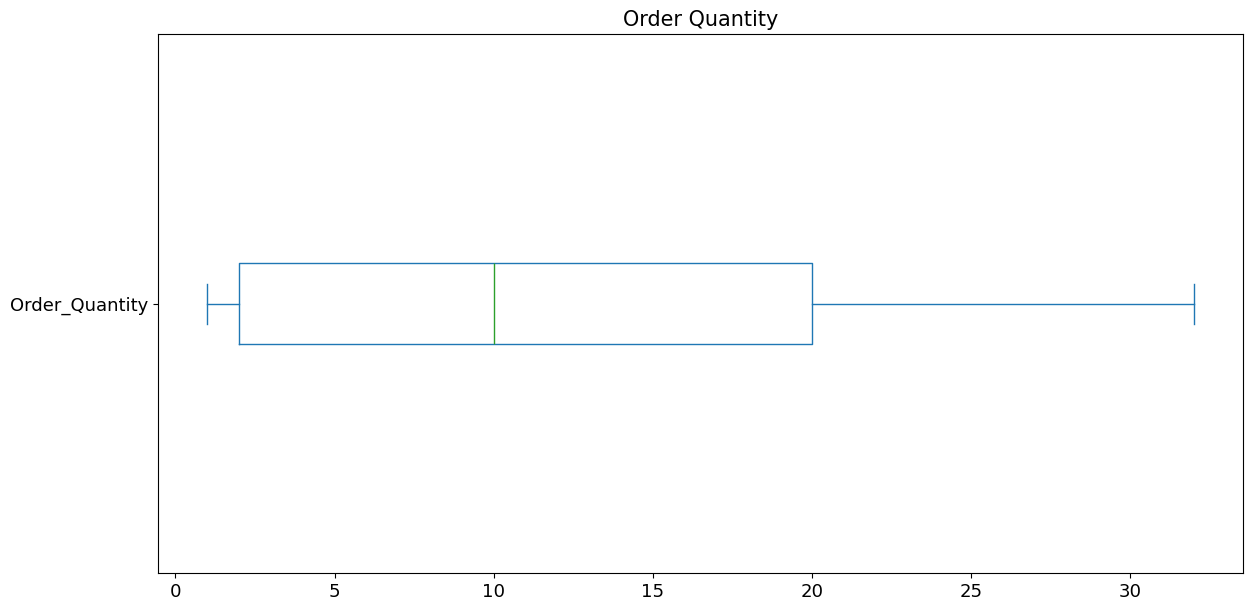

In [42]:
df['Order_Quantity'].plot(kind='box',vert=False,figsize=(14,7),fontsize=13)
plt.title("Order Quantity",fontsize=15)

> ### Sales According to Country


In [44]:
df['Country'].value_counts()

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

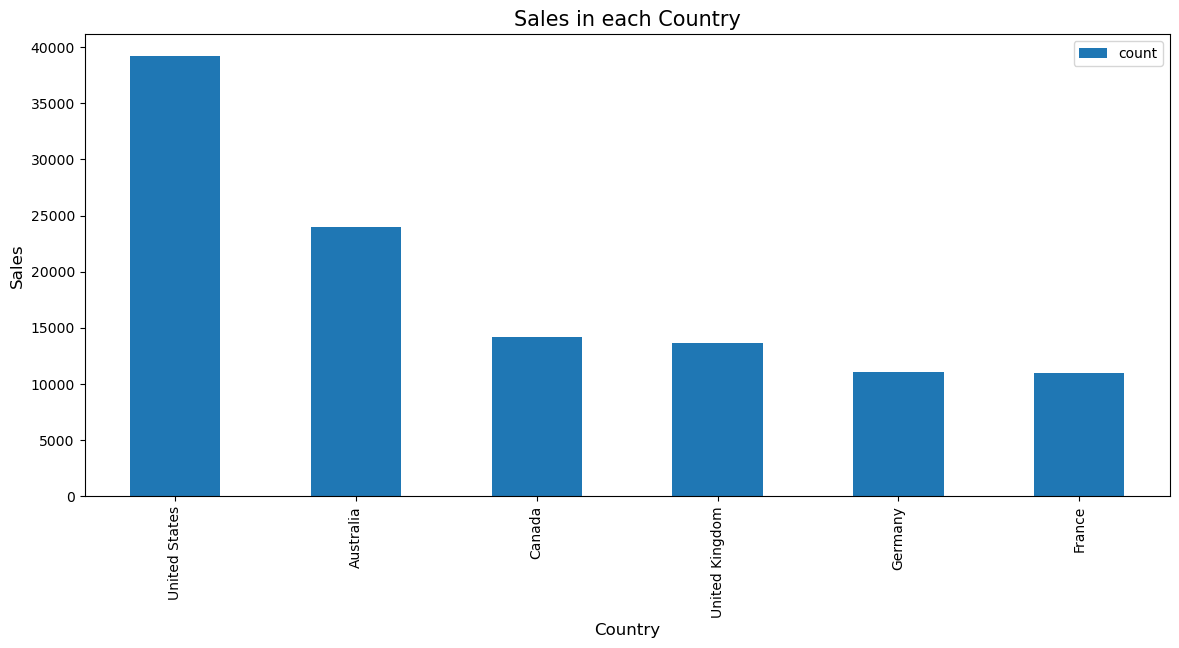

In [45]:
df['Country'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('Country',fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.title('Sales in each Country',fontsize=15)
plt.legend()

> ### List of every product sold


In [47]:
df.loc[: ,"Product"].unique() #from the first data to the last data from product coolumn 

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

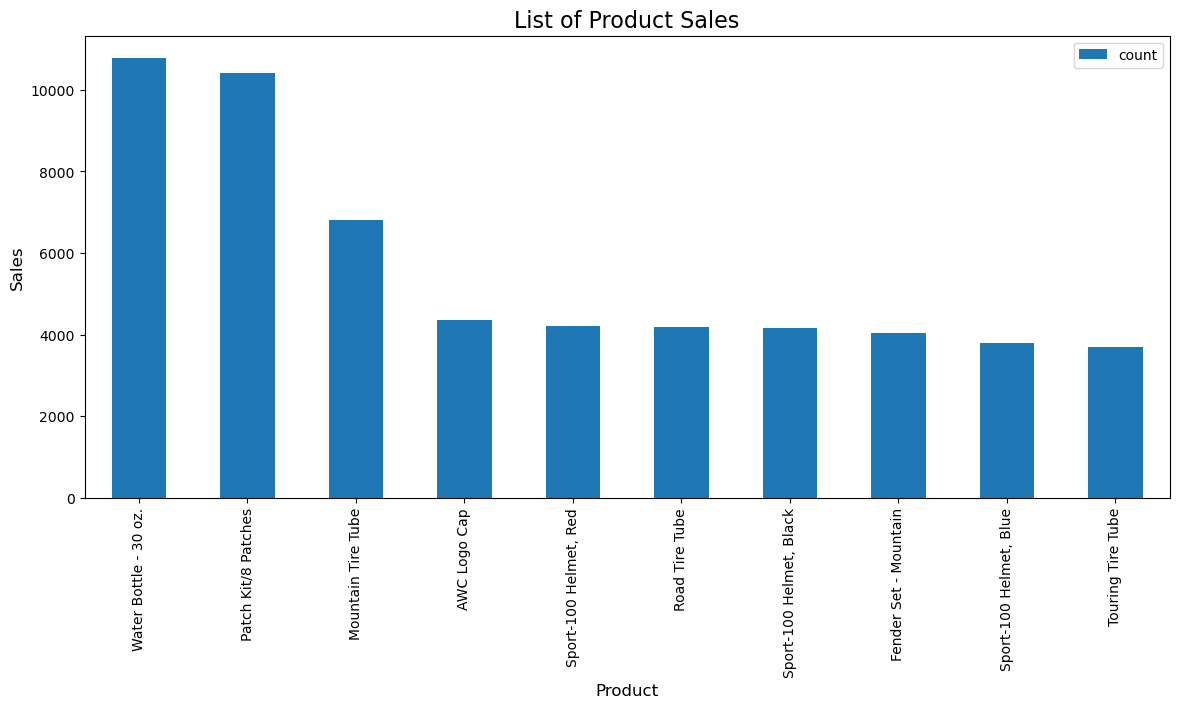

In [48]:
df.loc[: ,'Product'].value_counts().head(10).plot(kind='bar',figsize=(14,6))
plt.xlabel('Product',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.title('List of Product Sales',fontsize=16)
plt.legend()

### Relation between Unit cost & Unit Price

Text(0, 0.5, 'Unit Price')

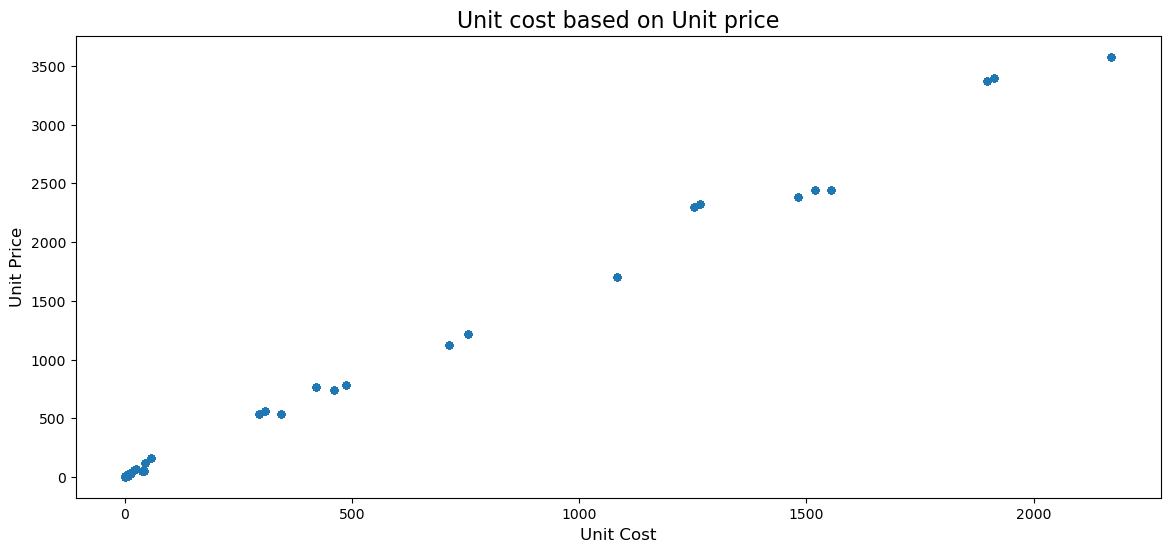

In [50]:
df.plot(kind='scatter',x='Unit_Cost',y='Unit_Price',figsize=(14,6))
plt.title("Unit cost based on Unit price",fontsize=16)
plt.xlabel('Unit Cost',fontsize=12)
plt.ylabel('Unit Price',fontsize=12)

### Customer Age According to Country


<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

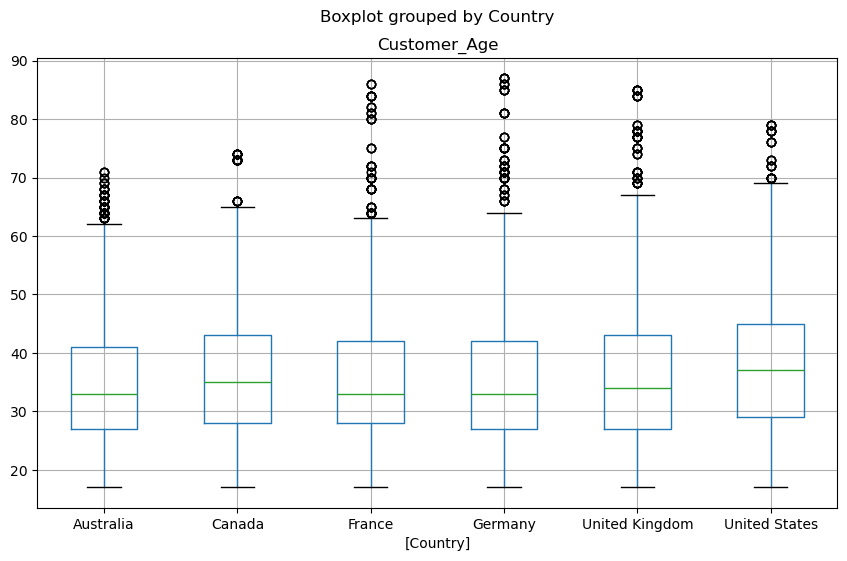

In [52]:
df[['Customer_Age','Country']].boxplot(by='Country',figsize=(10,6))

  ### How many orders were made in Canada or France?


In [93]:
df.loc[((df['Country']=='Canada') | (df['Country']=='France'))].shape[0]

25176

 > ### How many Bike Racks orders were made from Canada?


In [98]:
df.loc[((df['Country']=='Canada')& (df['Sub_Category']=='Bike Racks'))].shape[0]

104

> ### Sales in Each State of France


In [103]:
df.loc[df['Country']=='France','State'].value_counts()

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

Text(0.5, 1.0, 'Sales in each State of France')

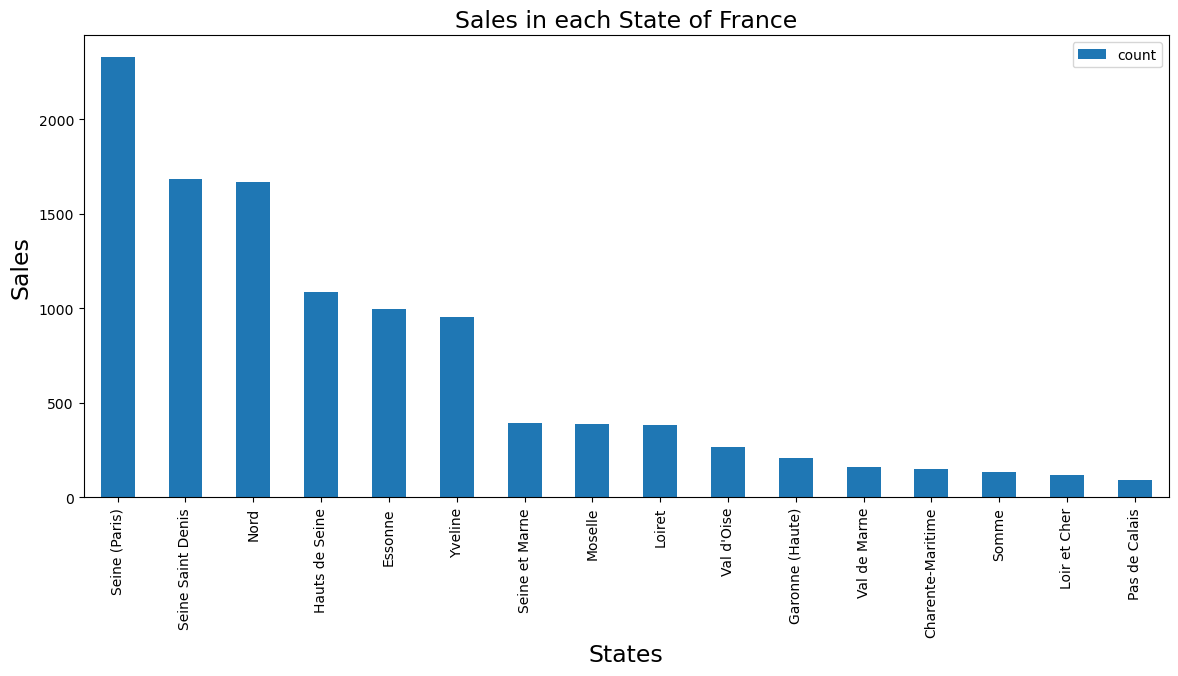

In [105]:
df.loc[df['Country']=='France','State'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel('States',fontsize=17)
plt.ylabel('Sales',fontsize=17)
plt.legend()
plt.title('Sales in each State of France',fontsize=17)

In [109]:
df['Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

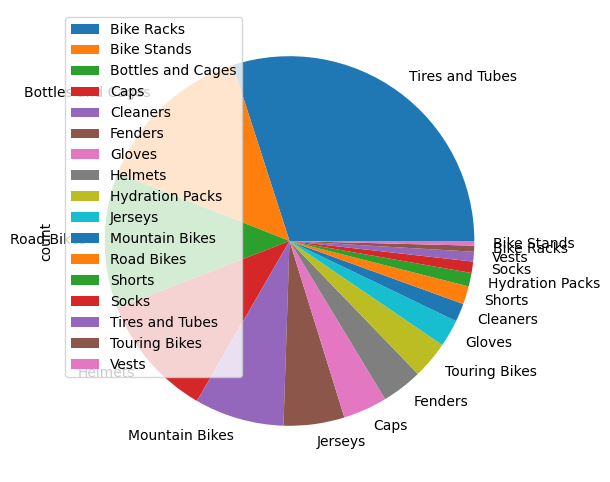

In [113]:
df['Sub_Category'].value_counts().plot(kind='pie',figsize=(14,6))
cat=df['Sub_Category'].unique()
plt.legend(cat)


In [115]:
df.loc[df['Product_Category']=='Accessories' ,"Sub_Category"].value_counts()

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

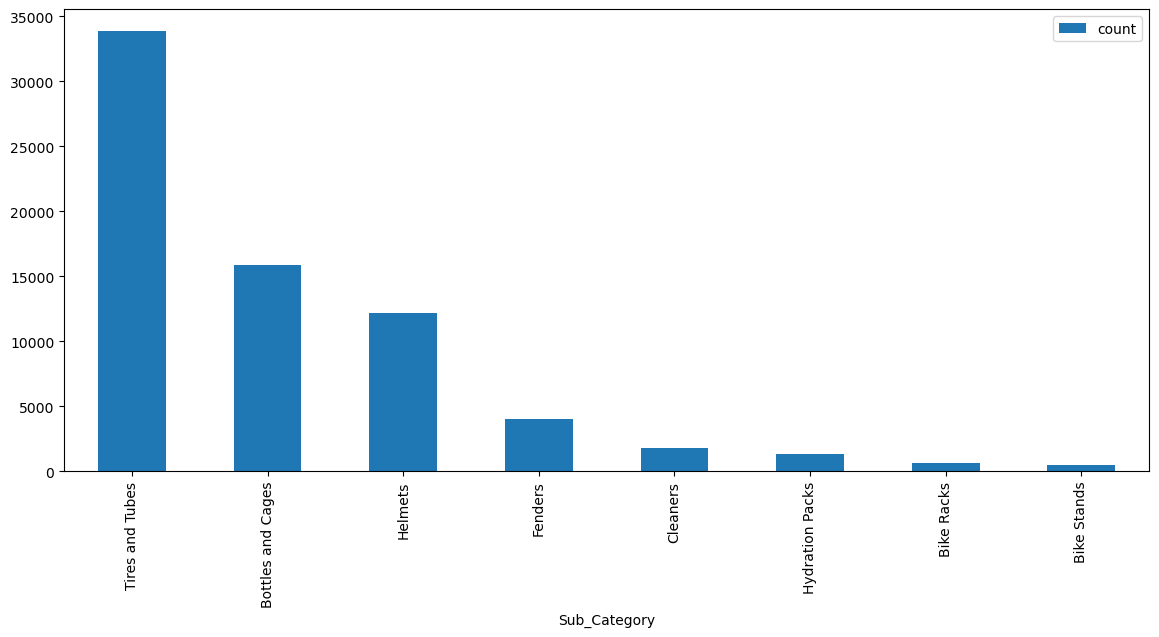

In [119]:
df.loc[df['Product_Category']=='Accessories','Sub_Category'].value_counts().plot(kind='bar',figsize=(14,6))
plt.legend()

### Which gender has the most amount of sales?


In [122]:
df['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

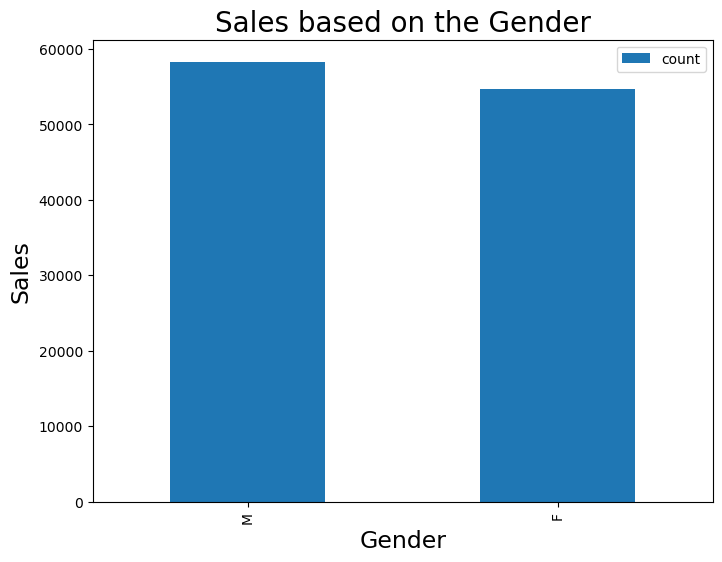

In [124]:
df['Customer_Gender'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel('Gender',fontsize=17)
plt.ylabel('Sales',fontsize=17)
plt.title('Sales based on the Gender',fontsize=20)
plt.legend()

### How many sales with more than 500 in Revenue were made by men?


In [127]:
df.loc[(df['Customer_Gender']=='M') & (df['Revenue']>500)].shape[0]

21773

### Get the top-5 sales with the highest revenue


In [138]:
df['Revenue'].sort_values(ascending=False).head(5)

112073    58074
112072    54069
71129     14312
70307     14169
70601     14169
Name: Revenue, dtype: int64

In [136]:
df.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-09-30


### Get the sale with the highest revenue


In [141]:
df['Revenue'].max()

58074

### What is the mean Order_Quantity of orders with more than 10K in revenue?


In [144]:
df.loc[df['Revenue']>10000 , 'Order_Quantity'].mean()

3.7218934911242605

### What is the mean Order_Quantity of orders with less than 10K in revenue?


In [147]:
df.loc[df['Revenue']<10000,'Order_Quantity'].mean()

11.913907519469818

### How many orders were made in May of 2016?


In [150]:
df.loc[(df['Year']==2016) & (df['Month']=='May')].shape[0]

5015

### How many orders were made in May,June,July of 2016?


In [157]:
df.loc[(df['Year']==2016) & (df['Month'].isin(['May','June','July']))].shape[0]

12164

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

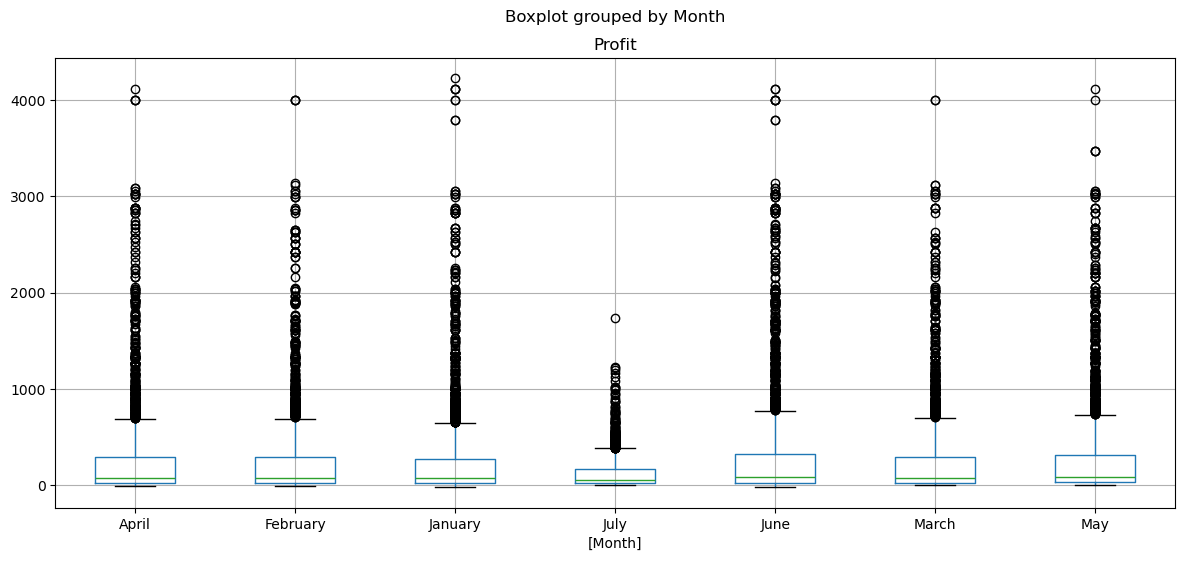

In [161]:
sales2016=df.loc[df['Year']==2016,['Profit','Month']] #where the year is 2016 and also group by profit and month columns
sales2016.boxplot(by='Month',figsize=(14,6))

> ### Increase the revenue by 10% to every sale made in France


In [164]:
sale_in_france=df.loc[df['Country']=='France','Revenue']
sale_in_france*=1.1
sale_in_france

50         865.7
51         865.7
52        3252.7
53        3136.1
60         688.6
           ...  
112979    1892.0
113000     405.9
113001     473.0
113034    1386.0
113035    1327.7
Name: Revenue, Length: 10998, dtype: float64

> ### Get the mean revenue of the sales group Adults (35-64) in United States


In [171]:
df.loc[(df['Age_Group']=='Adults (35-64)') & (df['Country']=='United States'),'Revenue'].mean()

726.7260473588342

### Get the mean col1 of the sales col2,col3
### df.loc[ (df['col2']==x) & (df['col3']==y) , 'col1' ]

> ### Get the mean revenue of the Adults (35-64) sales group


In [175]:
df.loc[df['Age_Group']=='Adults (35-64)','Revenue'].mean()

762.8287654055604

> ### Get all the sales made in the state of _Kentucky_


In [178]:
df.loc[df['State']=='Kentucky'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_date
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2013-11-04
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2015-11-04
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238,2014-04-16
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277,2016-04-16
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914,2014-04-16


> ### Modify all Unit_Price values adding 3% tax to them


In [181]:
tax=1.03
unit_price_tax=df['Unit_Price']*tax
unit_price_tax


0         123.60
1         123.60
2         123.60
3         123.60
4         123.60
           ...  
113031     65.92
113032     65.92
113033     65.92
113034     65.92
113035     65.92
Name: Unit_Price, Length: 113036, dtype: float64

> ### Add and calculate a new Calculated_Revenue column
#### Formula :  Calculated_Revenue=Cost+Profit


In [ ]:
df['Calculated_Revenue']=df['Cost']+df['Profit']
